In [1]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
import pandas as pd

In [21]:
positive = pd.read_csv('/workspaces/flare-cme-association/2024/positive_2024.csv')
positive["CME"] = 1
negative = pd.read_csv('/workspaces/flare-cme-association/2024/negative_2024.csv')
negative["CME"] = 0

In [22]:
data = pd.concat([positive, negative], ignore_index=True)

In [ ]:
data["Peak_Time_m"] = pd.to_datetime(data["Peak_Time"].str[:-4], format="%Y.%m.%d_%H:%M")


In [26]:
data = data[data["Peak_Time_m"].dt.year < 2016]

In [27]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA_ARS,GOES_Class,Peak_Time,CME,Peak_Time_m
0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,117.582,...,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1,2011-02-14 01:56:00
1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,99.163,...,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1,2011-03-06 14:30:00
2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,100.010,...,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1,2011-03-06 20:12:00
3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,110.939,...,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1,2011-06-06 06:41:00
4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,115.866,...,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1,2011-08-02 13:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,6.253248e+22,90.165,-0.002366,12614.020,35.714,5421.722,55.287,-0.004157,45.919,103.335,...,39.843,1896.202637,5.087,195.434,5983,12422,M4.5,2015.09.30_13:10_TAI,0,2015-09-30 13:10:00
623,6.643621e+22,84.077,0.000093,11090.810,31.987,5224.970,51.296,0.000169,43.756,97.200,...,37.826,1788.691162,4.949,8.202,5983,12422,M5.5,2015.10.01_00:13_TAI,0,2015-10-01 00:13:00
624,2.324072e+22,84.179,0.006449,9034.907,27.448,1471.023,48.342,0.011906,41.462,91.763,...,34.534,653.758423,4.523,197.017,6052,12445,M2.5,2015.11.03_12:03_TAI,0,2015-11-03 12:03:00
625,2.440117e+22,89.804,-0.002768,5499.289,20.669,1422.378,43.684,-0.006549,37.040,94.173,...,30.658,706.010132,4.131,94.907,6078,12449,M3.9,2015.11.08_13:12_TAI,0,2015-11-08 13:12:00


## Plotting histograms to see the variability of the data

In [28]:
data = data.drop(['HARPNUM','NOAA_ARS','GOES_Class','Peak_Time','Peak_Time_m'], axis=1)

In [32]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,117.582,0.104880,5.032922e+13,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287,1
1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,99.163,0.130367,3.344854e+13,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441,1
2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,100.010,-0.131131,7.631205e+13,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008,1
3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,110.939,0.004581,3.136324e+13,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530,1
4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,115.866,0.322013,4.301247e+13,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,6.253248e+22,90.165,-0.002366,12614.020,35.714,5421.722,55.287,-0.004157,45.919,103.335,-0.099780,8.886047e+13,1.281515e+13,1.383529e+24,39.843,1896.202637,5.087,195.434,0
623,6.643621e+22,84.077,0.000093,11090.810,31.987,5224.970,51.296,0.000169,43.756,97.200,-0.096507,8.563190e+13,1.764479e+13,1.296602e+24,37.826,1788.691162,4.949,8.202,0
624,2.324072e+22,84.179,0.006449,9034.907,27.448,1471.023,48.342,0.011906,41.462,91.763,-0.004202,2.553339e+13,8.577368e+12,3.665501e+23,34.534,653.758423,4.523,197.017,0
625,2.440117e+22,89.804,-0.002768,5499.289,20.669,1422.378,43.684,-0.006549,37.040,94.173,-0.240036,2.696008e+13,4.671822e+12,2.503863e+23,30.658,706.010132,4.131,94.907,0


In [33]:
X = data.drop(columns=['CME'])
y = data['CME']

In [34]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [31]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.555340,0.576869,0.605487,0.871939,0.204824,0.796086,0.617300,0.937815,0.565928,0.416585,0.202952,0.116747,0.133011,0.900055,0.128267,0.875866,0.253467,1.0
1,0.109806,0.389146,0.327431,0.415653,0.699841,0.109642,0.476976,0.359615,0.712539,0.353911,0.440602,0.132131,0.029364,0.088537,0.712075,0.130544,0.784360,0.020611,1.0
2,0.304362,0.357640,0.427324,0.374485,0.456517,0.294006,0.371139,0.467390,0.470255,0.363660,0.194188,0.311960,0.346695,0.202599,0.503348,0.267394,0.886803,0.208976,1.0
3,0.117444,0.578940,0.449293,0.119330,0.206602,0.100299,0.341865,0.557608,0.296639,0.489462,0.322072,0.123382,0.194273,0.034370,0.301701,0.131817,0.723843,0.124460,1.0
4,0.097242,0.581156,0.694119,0.462856,0.698426,0.174382,0.731767,0.835762,0.778385,0.546176,0.621194,0.172255,0.454135,0.098705,0.724424,0.172403,0.870762,0.367955,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[ 9.20123861  2.47101139  2.83214325 12.92279138  9.6344291  20.01545708
 15.0663107   5.14034632  9.19724585  8.27434151  3.89444494 17.60933233
  0.22663105 22.65254502  9.76512473 11.02698354 15.49735158  0.1035201 ]


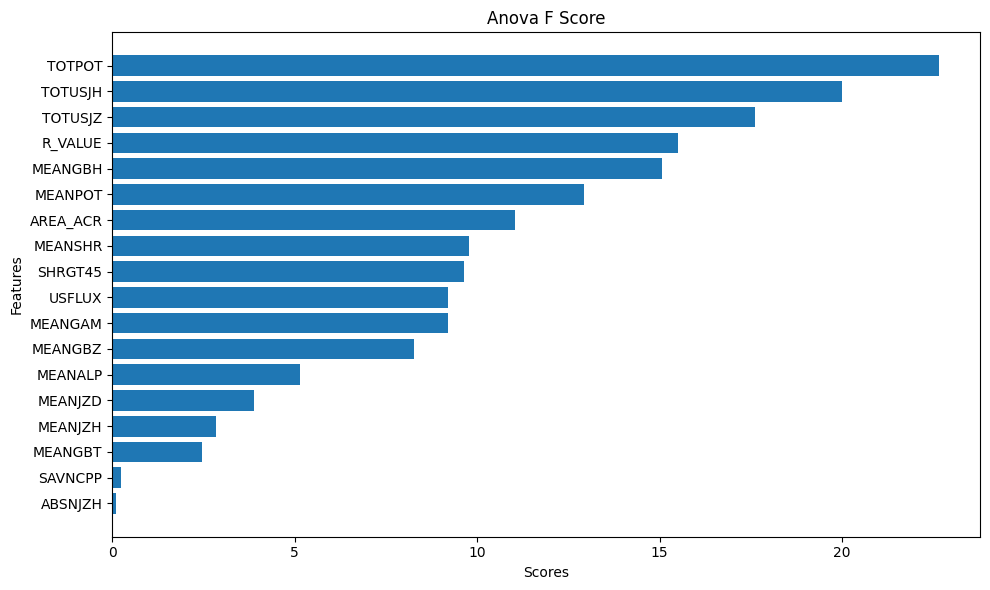

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
#ordered_columns=['SAVNCPP','ABSNJZH','MEANGBZ',"MEANGBT",'MEANGBH','TOTUSJH','TOTUSJZ','AREA_ACR','USFLUX','TOTPOT','SHRGT45',
#                 'MEANSHR','R_VALUE','MEANALP','MEANJZD','MEANGAM', 'MEANJZH','CME']
#df_reordered = df.loc[:, ordered_columns]

In [14]:
ordered_columns=['TOTPOT','TOTUSJH','TOTUSJZ','R_VALUE','MEANGBH','MEANPOT','AREA_ACR','MEANSHR','SHRGT45','USFLUX',
                           'MEANGAM','MEANGBZ','MEANALP','MEANJZD','MEANJZH',"MEANGBT",'SAVNCPP', 'ABSNJZH','CME']
df_reordered = df.loc[:, ordered_columns]


In [15]:
df_reordered

,TOTPOT,TOTUSJH,TOTUSJZ,R_VALUE,MEANGBH,MEANPOT,AREA_ACR,MEANSHR,SHRGT45,USFLUX,MEANGAM,MEANGBZ,MEANALP,MEANJZD,MEANJZH,MEANGBT,SAVNCPP,ABSNJZH,CME
0,0.133011,0.157575,0.142235,0.837254,0.753790,0.567343,0.086080,0.895704,0.871939,0.086611,0.937815,0.588089,0.678962,0.485318,0.690394,0.561371,0.088958,0.164015,1
1,0.088537,0.084350,0.092601,0.749782,0.451634,0.389468,0.087608,0.708633,0.699841,0.086190,0.712539,0.386897,0.462796,0.506505,0.507880,0.406908,0.024879,0.013869,1
2,0.202599,0.226183,0.218631,0.847709,0.351421,0.350893,0.179448,0.500915,0.456517,0.238904,0.470255,0.396149,0.553205,0.289121,0.580972,0.377625,0.257581,0.135327,1
3,0.034370,0.077162,0.086470,0.691932,0.323702,0.111812,0.088462,0.300243,0.206602,0.092185,0.296639,0.515527,0.628887,0.401939,0.597047,0.583305,0.145808,0.080831,1
4,0.098705,0.134155,0.120722,0.832375,0.692889,0.433697,0.115699,0.720922,0.698426,0.076328,0.778385,0.569345,0.862225,0.665822,0.776187,0.585365,0.336367,0.237837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.410574,0.492186,0.435169,0.882035,0.448449,0.386049,0.795334,0.472704,0.454781,0.497952,0.482788,0.613726,0.462162,0.273851,0.504427,0.610573,0.084822,0.079358,0
1035,0.372851,0.418108,0.384474,0.864436,0.444726,0.374945,0.747120,0.522763,0.499397,0.430517,0.536660,0.567172,0.449676,0.303740,0.495372,0.578195,0.058671,0.110489,0
1036,0.325278,0.229826,0.150070,0.851542,0.262306,0.704430,0.246962,0.488352,0.493866,0.247126,0.468246,0.231199,0.329449,0.155004,0.340308,0.219598,0.338810,0.353660,0
1037,0.344311,0.247118,0.175519,0.827845,0.241807,0.638663,0.249693,0.489472,0.486020,0.272277,0.464662,0.247408,0.348762,0.162224,0.376013,0.249159,0.266690,0.330642,0


In [16]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [17]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_56476/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_56476/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


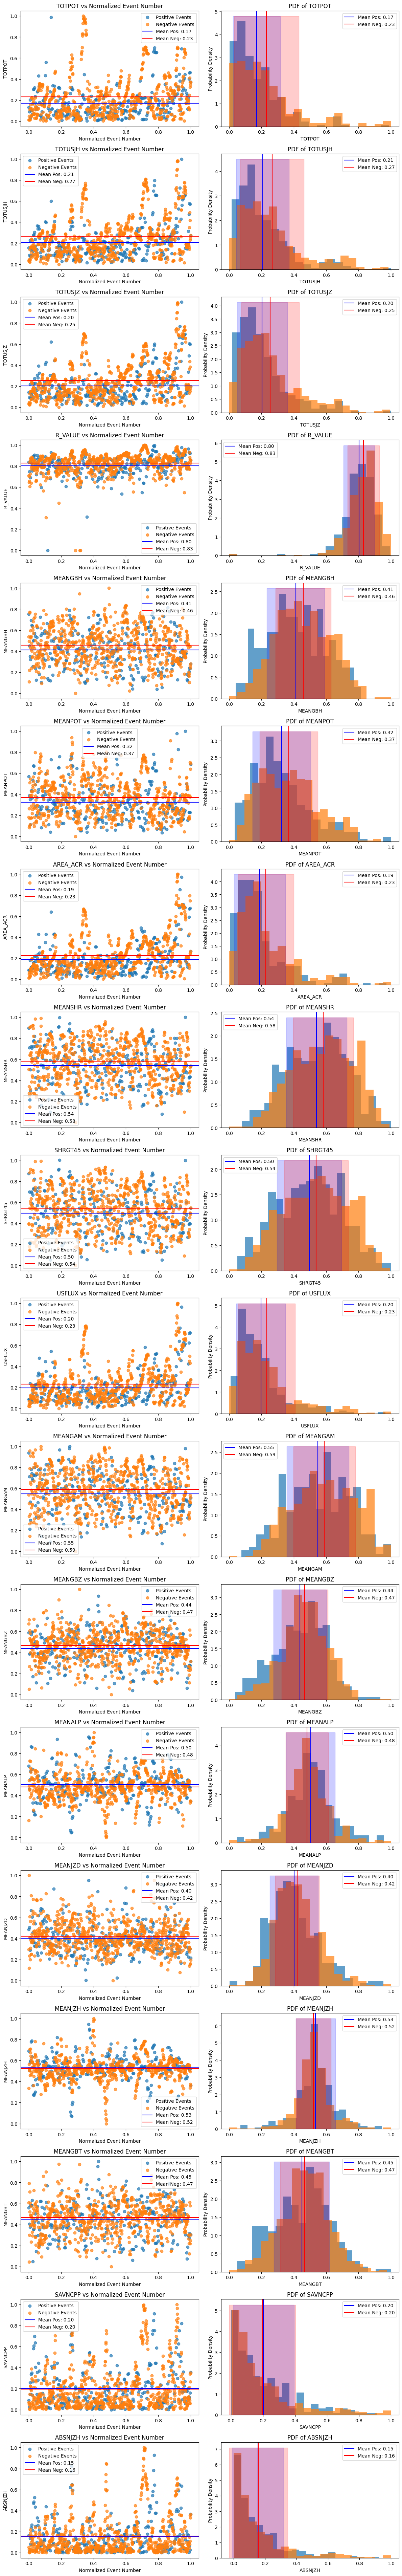

In [18]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_columns[i])
    plt.title(f"{ordered_columns[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_columns[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_columns[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.show()